IMPLEMENTING SUPPORT VECTOR MACHINE (SVM) TO CLASSIFY IMAGES OF DOGS AND CATS.

The Dataset Link: https://www.kaggle.com/c/dogs-vs-cats/data

The dataset contains 25,000 images of dogs and cats. The objective of this project is to successfully predict the labels for the images, where 1 = dog and 0 = cat. To accomplish this task, the Support Vector Machine (SVM) algorithm will be employed. SVM is a machine learning technique commonly utilized for image classification problems, such as differentiating between diverse visual entities like dogs and cats. The selection of SVM is motivated by its computational efficiency and ability to provide interpretable outcomes, making it a suitable choice, particularly when working with relatively smaller datasets or when interpretability is a critical requirement.

First, I have extracted the contents of the zip files to be able to use the dataset for training and testing the SVM model.
The extracted images from the files will be used as input data for the SVM model.

In [1]:
import zipfile #imports the zipfile module, which provides functionality to work with ZIP files.


In [2]:
#creating a list called zip_files that contains the names of the ZIP files you want to unzip. In this case, it includes 'test1' and 'train'.
zip_files = ['test1', 'train'] 

#open the ZIP file specified by the path "D:/dogs-vs-cats/{}.zip".format(zip_file). The {} placeholder is replaced with the current zip_file name using the format() method.
#The ZIP file is opened in read mode ("r") and assigned to the variable z.
for zip_file in zip_files:      #loop that iterates over each ZIP file name in the zip_files list.

    
    #extracts all the contents of the ZIP file to the current directory ("."). The extractall() method is used to extract all the files and directories from the ZIP file.
    with zipfile.ZipFile("D:/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

       #prints a message indicating that the current ZIP file has been unzipped. The {} placeholder is replaced with the current zip_file name using the format() method. 

test1 unzipped
train unzipped


In [3]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} images in directory.'.format(len(file_names))) #displaying number of images in the train file

NameError: name 'os' is not defined

In [ ]:
TRAIN_DIR_PATH = './test1'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} images in directory.'.format(len(file_names))) #displaying number of images in the test file

There are 12500 images in directory.


In [ ]:
IMAGE_FOLDER_PATH = "./train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)

In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd


#create empty lists to store the target labels (cat or dog) and the full file paths of the images, respectively.
targets = list()
full_paths = list()

#create empty lists to store the file paths of cat images and dog images, respectively.
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target by iterating
#extracts the target label (cat or dog) from the file name by splitting the name on the period (.) and taking the first part (assuming the file names follow a convention like "cat.jpg" or "dog.png").
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [ ]:
train_cats_dir[:5] #retrieves the first five elements from the train_cats_dir list.

['./train\\cat.0.jpg',
 './train\\cat.1.jpg',
 './train\\cat.10.jpg',
 './train\\cat.100.jpg',
 './train\\cat.1000.jpg']

In [ ]:
train_dogs_dir[:5] #retrieves the first five elements from the train_dogs_dir list.

['./train\\dog.0.jpg',
 './train\\dog.1.jpg',
 './train\\dog.10.jpg',
 './train\\dog.100.jpg',
 './train\\dog.1000.jpg']

In [ ]:
dataset.head()

,image_path,target
0,./train\cat.0.jpg,cat
1,./train\cat.1.jpg,cat
2,./train\cat.10.jpg,cat
3,./train\cat.100.jpg,cat
4,./train\cat.1000.jpg,cat


In [ ]:
len(dataset) #Length of dataset

25000

In [ ]:
print("the total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts() #counting number of dogs and cats
print(counts)

total data counts: 25000
cat    12500
dog    12500
Name: target, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

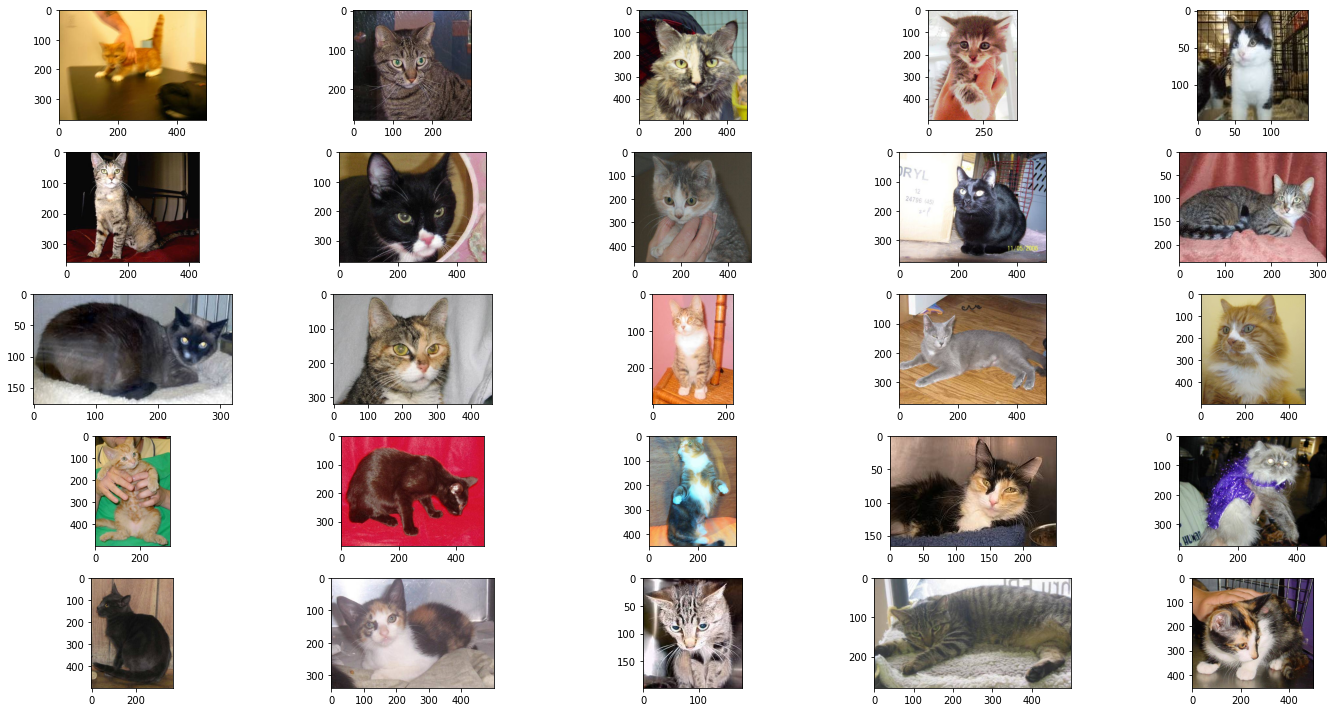

In [ ]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10)) #Fig size
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
    
fig.tight_layout()
plt.show() #Displaying images of cats

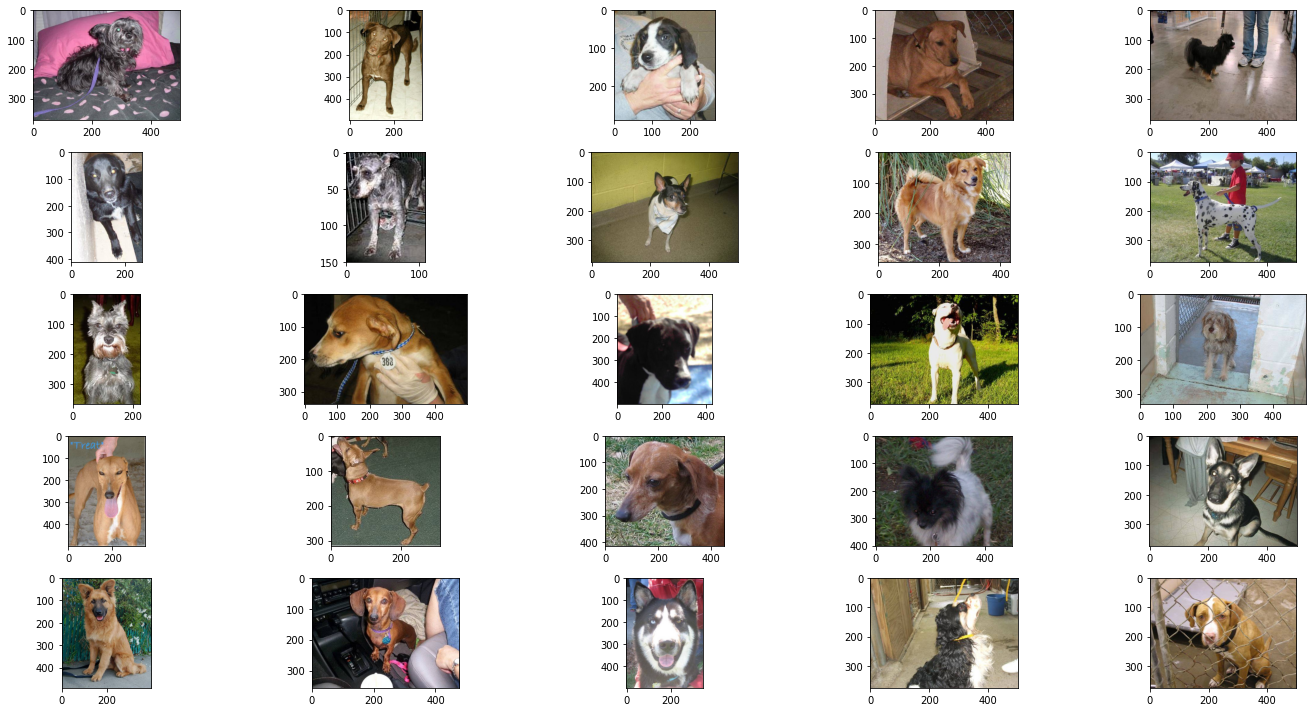

In [ ]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
    
fig.tight_layout() #Displaying images of dogs
plt.show()

In [ ]:
train, test_val = train_test_split(dataset, test_size=0.2, stratify=dataset['target'], random_state=20)
test, val = train_test_split(test_val, test_size=0.5,  stratify=test_val['target'], random_state=20)

#splitting the dataset into training, validation, and test sets

In [ ]:
target_distribution =test['target'].value_counts()
target_distribution.head(10)

cat    1250
dog    1250
Name: target, dtype: int64

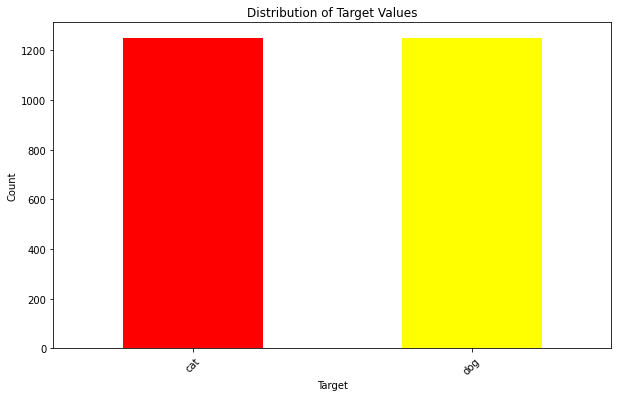

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated target_distribution
target_distribution = test['target'].value_counts()

# Create a bar chart
colors = ['red', 'yellow']  # Define the colors for the bars
target_distribution.plot(kind='bar', figsize=(10, 6), color=colors)

# Add title and axis labels
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [ ]:
TEST_DIR = 'test1/'
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)] # use this for test images

In [ ]:
dataset

,image_path,target
0,./train\cat.0.jpg,cat
1,./train\cat.1.jpg,cat
2,./train\cat.10.jpg,cat
3,./train\cat.100.jpg,cat
4,./train\cat.1000.jpg,cat
...,...,...
24995,./train\dog.9995.jpg,dog
24996,./train\dog.9996.jpg,dog
24997,./train\dog.9997.jpg,dog
24998,./train\dog.9998.jpg,dog


In [ ]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_image-0.23.2-cp310-cp310-win_amd64.whl (12.7 MB)
  Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
  Using cached imageio-2.34.0-py3-none-any.whl (313 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm

def preprocess_image(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))
    
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Flatten the image to a 1D array
    img_flat = img.flatten()
    
    return img_flat

X = []
y = dataset['target']
for image_path in dataset['image_path']:
    X.append(preprocess_image(image_path))
X = np.array(X)

pca = PCA(n_components=100)#Principal Component Analysis (PCA) to reduce the dimensionality of the image data to 100 components
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train)#Fit the SVM classifier to the training data

SVC()

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.658


In [ ]:
from sklearn.utils import gen_batches

batch_size = 1000  # Make sure this is an integer

X_test_pca = []
for batch in gen_batches(len(X_test), batch_size):
    X_test_pca.append(pca.transform(X_test[batch]))

X_test_pca = np.vstack(X_test_pca)

In [ ]:
test_predictions = clf.predict(X_test_pca)

test_predictions_mapped = [1 if label == 'dog' else 0 for label in test_predictions]

predictions_df = pd.DataFrame({'id': range(1, len(test_predictions_mapped) + 1), 'label': test_predictions_mapped})

predictions_df.to_csv('svm_test_predictions.csv', index=False)

predictions_df

,id,label
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
12495,12496,1
12496,12497,1
12497,12498,1
12498,12499,0
